In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [3]:
x = [1,2,3,4,5]
print(np.mean(x))
print(np.array(x).mean())
print(pd.Series(x).mean())

3.0
3.0
3.0


In [4]:
x = np.array([0.1,0.2,0.3,0.4,0.5])
print(len(x) / np.sum(1/x))
print(hmean(x))

0.21897810218978103
0.21897810218978103


#### 절사 평균이 필요한 이유

In [5]:
income = np.random.normal(2000000,500000,100)
print(np.mean(income))

1975248.1267816287


In [7]:
income = np.append(income, 10**9)
print(np.mean(income))

21544360.90860944


In [8]:
trim_mean(income, 0.2)

1966665.4503017948

#### 최빈값 계산

In [9]:
x = np.random.choice(['A','B','C'], 1000) # A, B, C라는 요소로 구성
x[:10]

array(['A', 'B', 'B', 'C', 'C', 'A', 'B', 'A', 'A', 'A'], dtype='<U1')

In [10]:
mode(x)

ModeResult(mode=array(['A'], dtype='<U1'), count=array([379]))

In [11]:
mode(x)[0]

array(['A'], dtype='<U1')

In [12]:
mode(x)[1]

array([379])

In [15]:
pd.Series(x).value_counts().index[0]

'A'

In [1]:
import numpy as np
from scipy.stats import *
import pandas as pd

In [3]:
x = [1,2,3,4,5]
print(np.var(x, ddof = 1)) # 분모 = n - 1
print(np.array(x).var())
print(pd.Series(x).var(ddof = 0)) #분모 = n

2.5
2.0
2.0


In [4]:
x = [1, 2, 3, 4, 5]
print(np.std(x, ddof = 1))
print(np.array(x).std())
print(pd.Series(x).std(ddof = 1))

1.5811388300841898
1.4142135623730951
1.5811388300841898


#### 변동계수의 필요성

In [5]:
x1 = np.array([1, 2, 3, 4, 5])
x2 = x1 * 10

print(np.std(x1, ddof = 1))
print(np.std(x2, ddof = 1))

1.5811388300841898
15.811388300841896


In [6]:
print(variation(x1))# 변동 계수
print(variation(x2))

0.47140452079103173
0.4714045207910317


In [7]:
print(np.std(x1,ddof = 1) / np.mean(x1))
print(np.std(x2, ddof = 1) / np.mean(x2))

0.5270462766947299
0.5270462766947299


In [8]:
z1 = (x1 - x1.mean()) / x1.std()
z2 = (x2 - x2.mean()) / x2.std()

print(z1)
print(z2)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]


In [9]:
# sklearn을 이용한 스케일링
X = pd.DataFrame({"X1":[1, 2, 3, 4, 5],
    "X2": [10, 20, 30, 40, 50]})

X

,X1,X2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Z = scaler.fit_transform(X) # fit_transform => ndarray
pd.DataFrame(Z)

,0,1
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


In [12]:
x = np.random.normal(100, 20, size = 1000)
x

array([103.93625584, 135.6615789 , 120.68706552, 139.34069571,
        78.83647238, 107.9974661 , 103.65753913, 113.32613786,
        83.29372234,  96.02736989, 101.79881051, 107.72900369,
        98.28011564,  99.38442094, 113.0689679 , 107.41631433,
       110.03580247, 108.63543195, 143.90829467,  87.32080576,
       101.94320733, 103.01372104, 103.73005522, 112.28681943,
       105.00519933,  98.3736608 ,  90.29108663,  89.3791114 ,
       112.43307271, 112.77711933,  82.20228468, 117.4503611 ,
       109.25148147,  69.30962231,  94.79389334, 108.23929774,
       112.22556706, 128.17845962,  83.61321706, 101.64138088,
       116.62589884, 114.95359959,  82.20656082,  95.52910259,
        74.50139019, 105.49661691,  80.53325149, 110.3037564 ,
        93.45963308, 109.15433146, 140.76290052, 127.95715613,
        71.16911407, 108.22146811,  69.8120612 , 113.78276439,
       116.48727147,  98.06424659, 107.49797439, 100.56200667,
       120.36756977,  87.08204196, 104.52989169,  96.01

In [13]:
print(np.ptp(x))
print(np.max(x) - np.min(x))

125.99647917102816
125.99647917102816


In [14]:
print(np.quantile(x, 0.75) - np.quantile(x, 0.25))
print(iqr(x))

25.69175031971082
25.69175031971082


#### 백분위수 및 사분위수 계산

In [15]:
x = np.arange(1, 12 , 1)
print(x)

[ 1  2  3  4  5  6  7  8  9 10 11]


In [16]:
print(np.percentile(x, 10))
print(np.quantile(x, 0.1))

2.0
2.0


In [17]:
print(np.percentile(x,25))
print(np.quantile(x,0.25))

3.5
3.5


#### 왜도 계산

In [18]:
%matplotlib inline
from matplotlib import pyplot as plt
x1 = [1] * 30 + [2] * 20 + [3] * 20 + [4] * 15 + [5] * 15 # 좌측으로 치우침
x2 = [1] * 15 + [2] * 20 + [3] * 30 + [4] * 20 + [5] * 15 # 치우치지 않음
x3 = [1] * 15 + [2] * 15 + [3] * 20 + [4] * 20 + [5] * 30 # 우측으로 치우침

In [19]:
pd.Series(x1).value_counts(sort = False)

1    30
2    20
3    20
4    15
5    15
dtype: int64

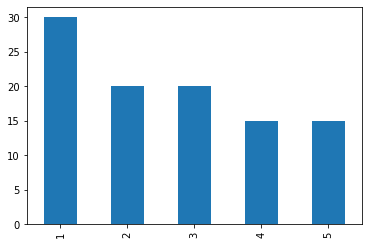

In [20]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

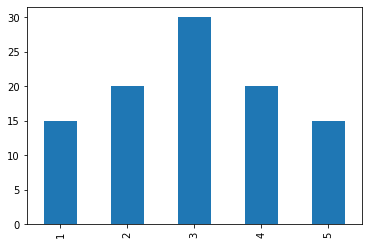

In [21]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

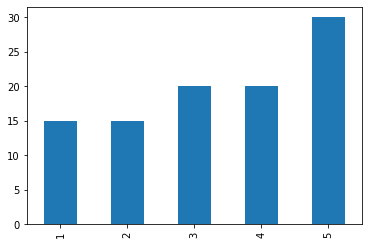

In [22]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [24]:
print("좌로 치우쳤을 때 왜도:", skew(x1))
print("치우치지 않았을 때 왜도:", skew(x2))
print("우로 치우친 왜도:", skew(x3))

좌로 치우쳤을 때 왜도: 0.3192801008486361
치우치지 않았을 때 왜도: 0.0
우로 치우친 왜도: -0.31928010084863606


In [25]:
x1 = [1] * 20 + [2] * 20 + [3] * 20 + [4] * 20 + [5] * 20 # 전혀 뾰족하지 않음
x2 = [1] * 10 + [2] * 20 + [3] * 40 + [4] * 20 + [5] * 10 # 조금 뾰족
x3 = [1] * 5 + [2] * 15 + [3] * 60 + [4] * 15 + [5] * 5 # 매우 뾰족

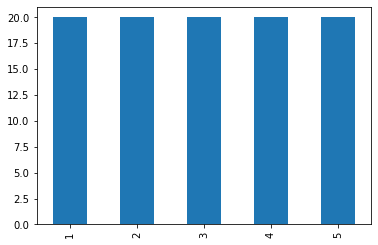

In [26]:
pd.Series(x1).value_counts(sort = False).plot(kind = 'bar')

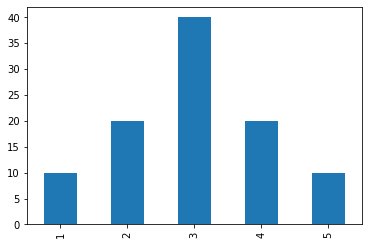

In [27]:
pd.Series(x2).value_counts(sort = False).plot(kind = 'bar')

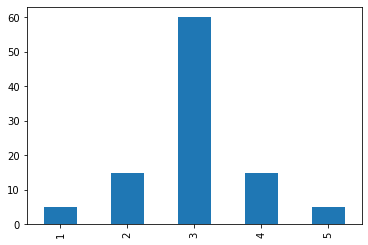

In [28]:
pd.Series(x3).value_counts(sort = False).plot(kind = 'bar')

In [29]:
print("전혀 뾰족하지 않을 때 (평평할 때) 첨도:", kurtosis(x1))
print("조금 뾰족할 때 첨도:", kurtosis(x2))
print("매우 뾰족할 때 첨도:", kurtosis(x3))

전혀 뾰족하지 않을 때 (평평할 때) 첨도: -1.3
조금 뾰족할 때 첨도: -0.5
매우 뾰족할 때 첨도: 0.8775510204081636


In [30]:
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

with open('성인여성_키_데이터.txt', 'r') as f:
    data = f.read().split('\n')
    data = list(map(float, data))

In [31]:
data[:3]

[150.27, 142.94, 160.99]

In [32]:
# 정규성 검정
from scipy.stats import *
kstest(data, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [33]:
# 단일 표본 t 검정 수행
print(ttest_1samp(data,163))

Ttest_1sampResult(statistic=-2.979804412662668, pvalue=0.006510445335847954)


In [35]:
import pandas as pd
df1 = pd.read_csv('반별_점수_type1.csv', engine = 'python')
df1.head()

,반,점수
0,A,73
1,A,69
2,A,71
3,A,71
4,A,73


In [36]:
group_A = df1['점수'].loc[df1['반'] == 'A'].values
group_B = df1['점수'].loc[df1['반'] == 'B'].values

print(group_A)
print(group_B)

[73 69 71 71 73 67 73 69 62 74 68 66 70 82 70 65 76 73 58 81]
[63 56 73 61 55 77 75 65 61 55]


In [37]:
print(kstest(group_A, 'norm'))
print(kstest(group_B, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [38]:
# 등분산 검정
levene(group_A, group_B)

LeveneResult(statistic=2.033067087400979, pvalue=0.164964086222101)

In [39]:
import numpy as np
np.var(group_A, None, ddof = 1)

32.26052631578948

In [40]:
print(ttest_ind(group_A,group_B, equal_var = True))

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


In [41]:
df2 = pd.read_csv("반별_점수_type2.csv", engine = "python")
df2.head()

,A반,B반
0,73,63.0
1,69,56.0
2,71,73.0
3,71,61.0
4,73,55.0


In [42]:
# 길이가 달라서 결측이 발생할 수 있으므로, 결측을 제거한 뒤 각 컬럼을 group_A와 group_B에 저장
group_A = df2['A반'].dropna().values
group_B = df2['B반'].dropna().values

In [43]:
group_A

array([73, 69, 71, 71, 73, 67, 73, 69, 62, 74, 68, 66, 70, 82, 70, 65, 76,
       73, 58, 81], dtype=int64)

In [44]:
group_B

array([63., 56., 73., 61., 55., 77., 75., 65., 61., 55.])

In [45]:
# A와 B간에는 차이가 존재함을 확인 
print(ttest_ind(group_A, group_B, equal_var = True)) 

Ttest_indResult(statistic=2.5128526794964134, pvalue=0.01801095352893767)


In [46]:
import os
import pandas as pd
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [47]:
df = pd.read_csv('다이어트약_효과검증.csv')

In [48]:
df.columns

Index(['다이어트전(kg)', '다이어트후(kg)'], dtype='object')

In [49]:
before = df['다이어트전(kg)']
after = df['다이어트후(kg)']

In [50]:
# 정규성 검정
from scipy.stats import *
kstest(after - before, 'norm')

KstestResult(statistic=0.7424620196514834, pvalue=7.04108433205159e-29)

In [51]:
ttest_rel(before, after) # 확실한 양의 효가

Ttest_relResult(statistic=9.70596986565785, pvalue=5.370404098342324e-13)

In [52]:
import pandas as pd
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-2.-탐색적-데이터-분석\2. 탐색적 데이터 분석\데이터')

In [53]:
df = pd.read_csv('지점별_일별판매량.csv', engine = 'python')
df.head()

,일자,지점A,지점B,지점C
0,1,124,118,216
1,2,147,141,214
2,3,129,130,212
3,4,123,127,179
4,5,147,107,222


In [54]:
# 데이터 분할 (결측이 포함되어 있을 수 있으므로 dropna를 사용)
A = df['지점A'].dropna().values
B = df['지점B'].dropna().values
C = df['지점C'].dropna().values

In [55]:
A

array([124, 147, 129, 123, 147, 149, 140, 142, 124, 166, 127, 130, 139,
       121, 149, 155, 140, 150, 137, 144, 136, 126, 150, 142, 149, 127,
       140, 138, 128, 117], dtype=int64)

([<matplotlib.axis.XTick at 0x18bf2850460>,
 [Text(0, 0, '지점 A'), Text(0, 0, '지점 B'), Text(0, 0, '지점 C')])

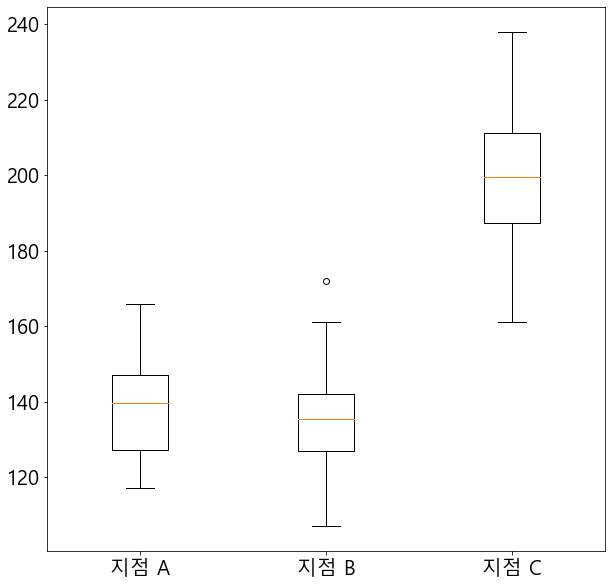

In [56]:
# 박스플롯으로 시각화
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 10)
plt.boxplot([A,B,C])
plt.xticks([1,2,3],['지점 A','지점 B','지점 C'])

In [57]:
# 정규성 검정: 세 변수 모두 정규 분포를 띔을 확인
from scipy.stats import *
print(kstest(A, 'norm'))
print(kstest(B, 'norm'))
print(kstest(C, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


In [58]:
print(f_oneway(A,B,C))

F_onewayResult(statistic=178.43825416847133, pvalue=1.6337420285664805e-31)


In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
Group = ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C)
Data = A.tolist() + B.tolist() + C.tolist()

print(pairwise_tukeyhsd(Data, Group))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B     -1.4   0.9 -10.5745  7.7745  False
     A      C  62.2333 0.001  53.0589 71.4078   True
     B      C  63.6333 0.001  54.4589 72.8078   True
----------------------------------------------------
